# Import Package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Hotel Booking Demand Dataset


### Source
Antonio, N., de Almeida, A. and Nunes, L. (2019) “Hotel booking demand datasets,” Data in Brief, 22, pp. 41–49. Available at: https://doi.org/10.1016/j.dib.2018.11.126. 

Downloaded and cleaned data: [tidytuesday](https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-02-11)


### Data Dictionary

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
|hotel                          |character | Hotel (H1 = Resort Hotel or H2 = City Hotel) |
|is_canceled                    |double    | Value indicating if the booking was canceled (1) or not (0) |
|lead_time                      |double    | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
|arrival_date_year              |double    | Year of arrival date|
|arrival_date_month             |character | Month of arrival date|
|arrival_date_week_number       |double    | Week number of year for arrival date|
|arrival_date_day_of_month      |double    | Day of arrival date|
|stays_in_weekend_nights        |double    | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
|stays_in_week_nights           |double    |  Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|adults                         |double    | Number of adults|
|children                       |double    | Number of children|
|babies                         |double    |Number of babies |
|meal                           |character | Type of meal booked. Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package;<br>BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) |
|country                        |character | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
|market_segment                 |character | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|distribution_channel           |character | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|is_repeated_guest              |double    | Value indicating if the booking name was from a repeated guest (1) or not (0) |
|previous_cancellations         |double    | Number of previous bookings that were cancelled by the customer prior to the current booking |
|previous_bookings_not_canceled |double    | Number of previous bookings not cancelled by the customer prior to the current booking |
|reserved_room_type             |character | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
|assigned_room_type             |character | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
|booking_changes                |double    | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
|deposit_type                   |character | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:<br>No Deposit – no deposit was made;<br>Non Refund – a deposit was made in the value of the total stay cost;<br>Refundable – a deposit was made with a value under the total cost of stay. |
|agent                          |character | ID of the travel agency that made the booking |
|company                        |character | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
|days_in_waiting_list           |double    | Number of days the booking was in the waiting list before it was confirmed to the customer |
|customer_type                  |character | Type of booking, assuming one of four categories:<br>Contract - when the booking has an allotment or other type of contract associated to it;<br>Group – when the booking is associated to a group;<br>Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;<br>Transient-party – when the booking is transient, but is associated to at least other transient booking|
|adr                            |double    | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
|required_car_parking_spaces    |double    | Number of car parking spaces required by the customer |
|total_of_special_requests      |double    | Number of special requests made by the customer (e.g. twin bed or high floor)|
|reservation_status             |character | Reservation last status, assuming one of three categories:<br>Canceled – booking was canceled by the customer;<br>Check-Out – customer has checked in but already departed;<br>No-Show – customer did not check-in and did inform the hotel of the reason why |
|reservation_status_date        |double    | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel|

# Data Reading

In [2]:
# return the first (n) row, by default is 5 row
df_hotels = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv')
df_hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# adding column id as a identifier
df_hotels = df_hotels.reset_index().rename(columns={'index':'id'})
df_hotels.head()

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Data Preparation and Data Cleaning

In [4]:
# create function to check the data types, sum of null value, percentage of null value, and sum of unique value for each column in dataframe
def check_values(df):
    data_loop = []
    for i in df.columns:
        data_loop.append([i, 
                     df[i].dtype, # check the data type
                     df[i].isna().sum(), # sum of null value
                     round(100*(df[i].isna().sum()/len(df)),2), # percentage of null value 
                     df[i].nunique() # sum of unique value
                     ])
    return pd.DataFrame(data=data_loop, columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique'])

In [5]:
check_values(df_hotels)

,dataFeatures,dataType,null,nullPct,unique
0,id,int64,0,0.00,119390
1,hotel,object,0,0.00,2
2,is_canceled,int64,0,0.00,2
3,lead_time,int64,0,0.00,479
4,arrival_date_year,int64,0,0.00,3
5,arrival_date_month,object,0,0.00,12
6,arrival_date_week_number,int64,0,0.00,53
7,arrival_date_day_of_month,int64,0,0.00,31
8,stays_in_weekend_nights,int64,0,0.00,17
9,stays_in_week_nights,int64,0,0.00,35


#### Handling Missing Values

In [6]:
# based on results, agent column and company column has the highest percentage of missing values
# so i will to drop that column
df_hotels = df_hotels.drop(['agent','company'], axis=1)

In [7]:
# # moreover children column has a lower percentage of missing values
# # so i will to fill that missing values with median
df_hotels['children'] = df_hotels['children'].fillna(df_hotels['children'].median())

In [8]:
check_values(df_hotels)

,dataFeatures,dataType,null,nullPct,unique
0,id,int64,0,0.00,119390
1,hotel,object,0,0.00,2
2,is_canceled,int64,0,0.00,2
3,lead_time,int64,0,0.00,479
4,arrival_date_year,int64,0,0.00,3
5,arrival_date_month,object,0,0.00,12
6,arrival_date_week_number,int64,0,0.00,53
7,arrival_date_day_of_month,int64,0,0.00,31
8,stays_in_weekend_nights,int64,0,0.00,17
9,stays_in_week_nights,int64,0,0.00,35


### Check Data Consistency

In [9]:
# check data consistency with unique values in categorical data
# select column with object data types
data = df_hotels.select_dtypes(include=['object'])
obj_column = data.columns
obj_column

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [10]:
data_obj = ['hotel', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status']

for i in data_obj:
    values = df_hotels[i].unique()
    print(f"{i}: {values}")
    print('=' * 100)

hotel: ['Resort Hotel' 'City Hotel']
meal: ['BB' 'FB' 'HB' 'SC' 'Undefined']
market_segment: ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
distribution_channel: ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
reserved_room_type: ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
assigned_room_type: ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
deposit_type: ['No Deposit' 'Refundable' 'Non Refund']
customer_type: ['Transient' 'Contract' 'Transient-Party' 'Group']
reservation_status: ['Check-Out' 'Canceled' 'No-Show']


In [11]:
# replacing 'Undefined' categorical value with 'SC' in meal column
df_hotels['meal'].replace(to_replace= 'Undefined', value= 'SC', inplace=True)
df_hotels['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

### Check Outlier

In [12]:
# check column with int and float data type
data = df_hotels.select_dtypes(exclude=['object'])
int_column = data.columns
int_column

Index(['id', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

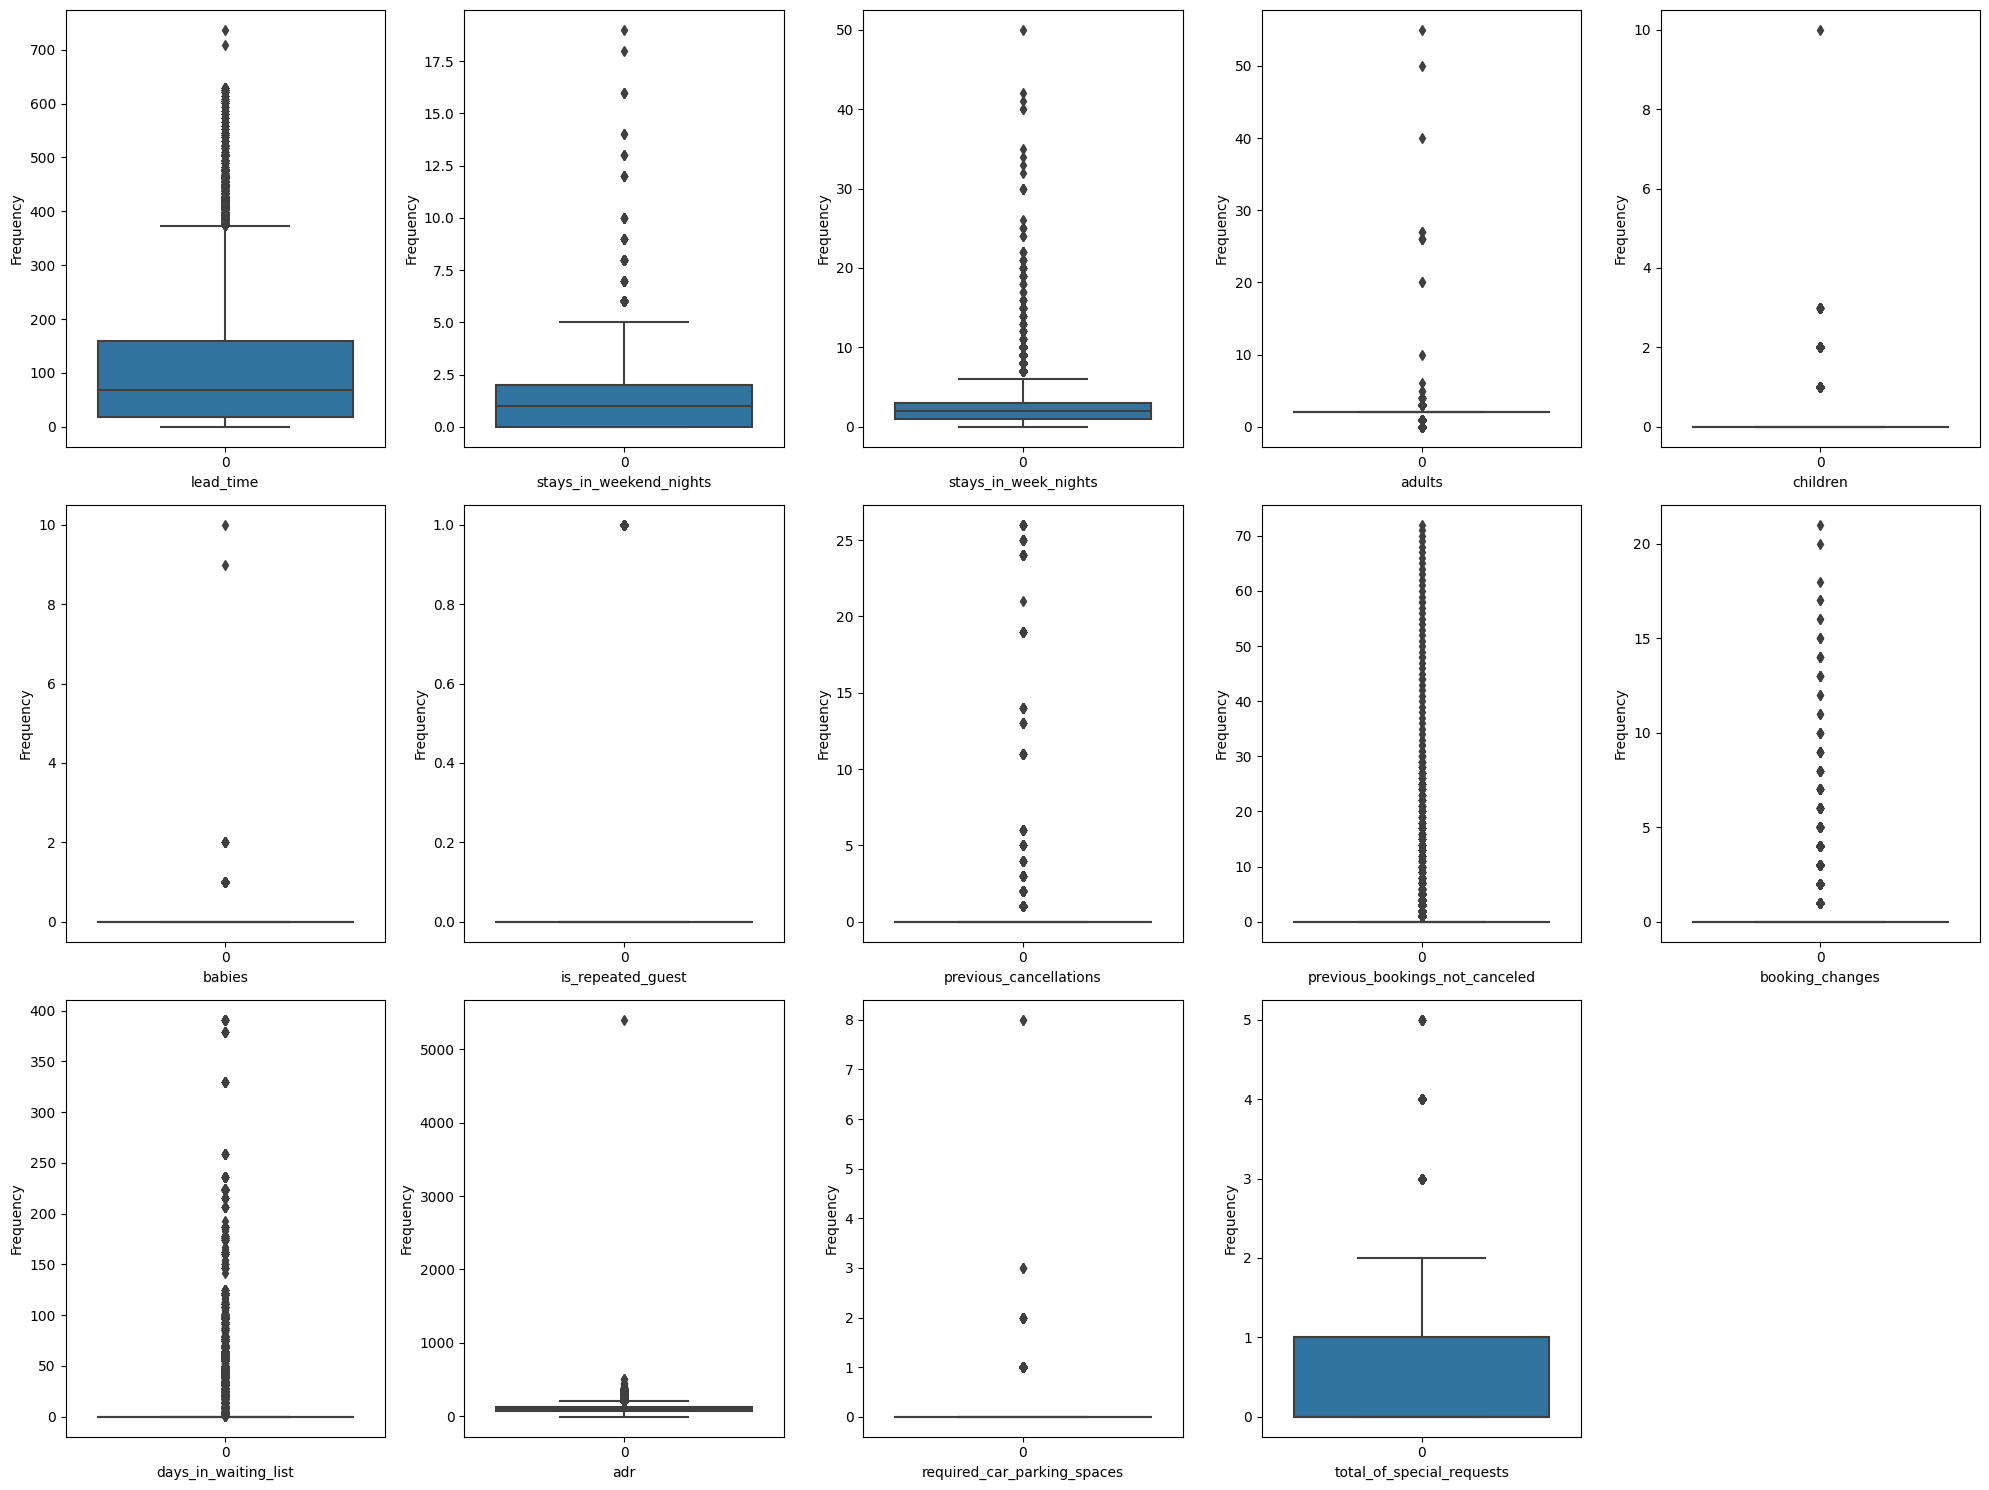

In [13]:
# check outlier with boxplot
# create a looping to show the boxplot separately
list_of_column = ['lead_time',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests']
n = 1
plt.figure(figsize=(20,15))

for columns in list_of_column:
       plt.subplot(3,5,n)
       n = n + 1
       sns.boxplot(df_hotels[columns])
       plt.gca().set(xlabel=columns, ylabel='Frequency')
       plt.tight_layout()

C:\Users\adityanugrahass\AppData\Local\Temp\ipykernel_31144\3315222276.py:15: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = df_hotels['hotel'], y = df_hotels[i], palette = 'viridis').set(xlabel = None, ylabel = None)
C:\Users\adityanugrahass\AppData\Local\Temp\ipykernel_31144\3315222276.py:15: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = df_hotels['hotel'], y = df_hotels[i], palette = 'viridis').set(xlabel = None, ylabel = None)
C:\Users\adityanugrahass\AppData\Local\Temp\ipykernel_31144\3315222276.py:15: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = df_hotels['hotel'], y = df_hotels[i], palette = 'viridis').set(xlabel = None, ylabel = None)
C:\Users\adityanugrahass\AppData\Local\Temp\ipykernel_31144\3315222276.py:15: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = df_hotels['hotel'], y = df_hotels[i], pal

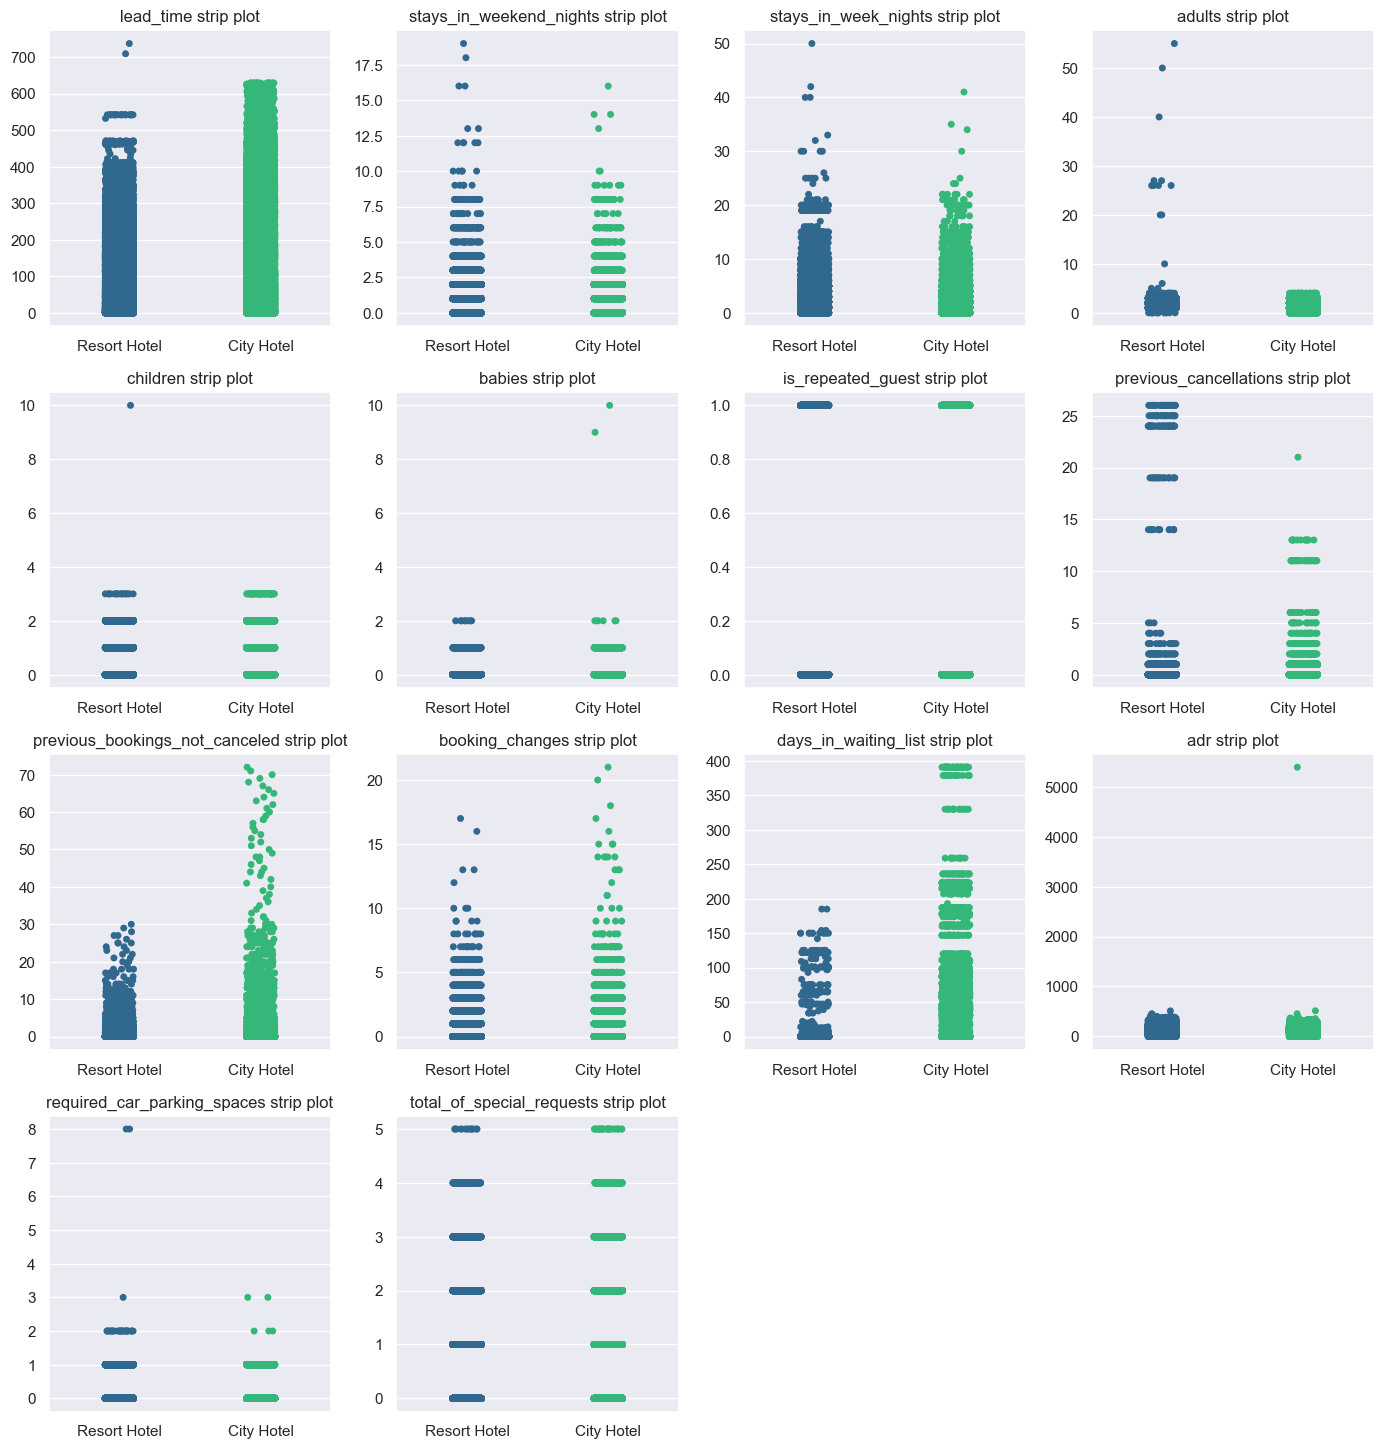

In [14]:
list_of_column = ['lead_time',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests']

n = 1

sns.set_theme(font_scale = 1)
plt.figure(figsize = (14, 18))

for i in list_of_column:
    plt.subplot(5,4,n)
    sns.stripplot(x = df_hotels['hotel'], y = df_hotels[i], palette = 'viridis').set(xlabel = None, ylabel = None)
    plt.title(f'{i} strip plot')
    n = n + 1
    plt.tight_layout()

In [15]:
df_hotels[df_hotels['babies'] > 5].T

,46619,78656
id,46619,78656
hotel,City Hotel,City Hotel
is_canceled,0,0
lead_time,37,11
arrival_date_year,2016,2015
arrival_date_month,January,October
arrival_date_week_number,3,42
arrival_date_day_of_month,12,11
stays_in_weekend_nights,0,2
stays_in_week_nights,2,1


In [16]:
df_hotels['adr'].describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [17]:
df_hotels[df_hotels['adr'] > 500].T

,15083,48515,111403
id,15083,48515,111403
hotel,Resort Hotel,City Hotel,City Hotel
is_canceled,0,1,0
lead_time,1,35,0
arrival_date_year,2015,2016,2017
arrival_date_month,July,March,May
arrival_date_week_number,29,13,19
arrival_date_day_of_month,15,25,9
stays_in_weekend_nights,0,0,0
stays_in_week_nights,1,1,1


In [18]:
# set new value for adr for columns adr and babies
df_hotels.loc[df_hotels['babies'] > 5, ['babies']] = df_hotels['babies'].median()
df_hotels.loc[df_hotels['adr'] == 5400, ['adr']] = df_hotels['adr'].median()

# Exploratory Data Analysis

#### How many visitor there are registered and not registered a reservation? From these numbers create a conclusion for each proportion!

In [19]:
# count percentage of booking canceled
df_hotels.is_canceled.value_counts(normalize=True)*100

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64

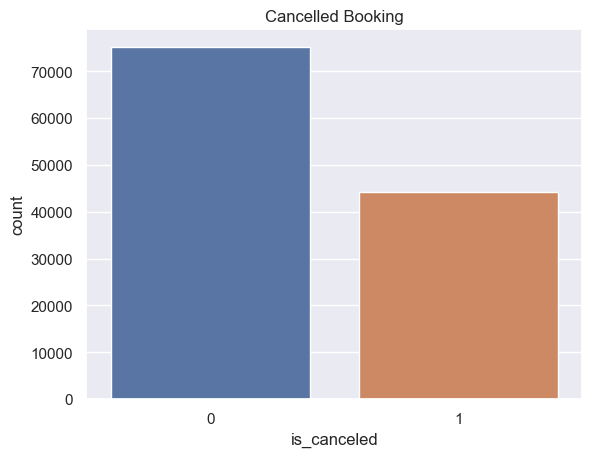

In [20]:
sns.countplot(data=df_hotels, x='is_canceled')
plt.title('Cancelled Booking')
plt.show()

###### What we do see here? There are quite number of visitors who canceled reservations, it's up to 37% from all visitors

#### A. On "City Hotel", what percentage of canceled reservations?
#### B. On "Resort Hotel", what percentage of canceled reservations?

In [21]:
# canceled for City Hotel
city = round(len(df_hotels[(df_hotels.hotel=='City Hotel')&(df_hotels.is_canceled==1)]) / 
len(df_hotels[(df_hotels.hotel=='City Hotel')]), 2)

print(f"Percentage of cancelation for City Hotel is {round(city*100)}%")

Percentage of cancelation for City Hotel is 42%


In [22]:
# canceled for Resort Hotel
resort = round(len(df_hotels[(df_hotels.hotel=='Resort Hotel')&(df_hotels.is_canceled==1)]) / 
len(df_hotels[(df_hotels.hotel=='Resort Hotel')]), 2)

print(f"Percentage of cancelation for Resort Hotel is {round(resort*100)}%")

Percentage of cancelation for Resort Hotel is 28%


#### Do filtering to shows it only visitor data that did'nt cancel reservation, and put the result into `df_checkout` 

In [23]:
df_checkout = df_hotels[df_hotels.is_canceled==0]
df_checkout.shape

(75166, 31)

#### A. Show total reservation per arrival month for each hotel type.

#### B. What month are the most reservations in each type of hotel? Create a conclusion, is the trend the same in both types of hotels?

#### C. Do it like point B but with the name of the month that has been mapped into months in numbers.

**> (!) For this question and further will use the dataframe `df_checkout`** 

In [24]:
# A. total reservation per arrival month for each hotel type
df_checkout.groupby(['hotel','arrival_date_month']).agg({'id':'nunique'})

id
hotel        arrival_date_month      
City Hotel   April               4015
             August              5381
             December            2392
             February            3064
             January             2254
             July                4782
             June                4366
             March               4072
             May                 4579
             November            2696
             October             4337
             September           4290
Resort Hotel April               2550
             August              3257
             December            2017
             February            2308
             January             1868
             July                3137
             June                2038
             March               2573
             May                 2535
             November            1976
             October             2577
             September           2102

In [25]:
# B. Name of month with the most reservations in each type of hotel
df_checkout.groupby(['hotel','arrival_date_month'],as_index=False).size()\
.sort_values(by=['hotel','size'],ascending=[True,False])

,hotel,arrival_date_month,size
1,City Hotel,August,5381
5,City Hotel,July,4782
8,City Hotel,May,4579
6,City Hotel,June,4366
10,City Hotel,October,4337
11,City Hotel,September,4290
7,City Hotel,March,4072
0,City Hotel,April,4015
3,City Hotel,February,3064
9,City Hotel,November,2696


###### As you can see, for each hotel has the highest reservations in August, there are has the same trend. It can be happen, because based on dataset for each type hotel has a location in Portugal. Portugal brings on the summer highs in August, and the other fact metioned that the best time to visit Portugal is between June and August.

In [26]:
# C. Do it like point B but with the name of the month that has been mapped into months in numbers.
import calendar
month_dict = {month: index for index, month in enumerate(calendar.month_name) if month}
month_dict

{'January': 1,
 'February': 2,
 'March': 3,
 'April': 4,
 'May': 5,
 'June': 6,
 'July': 7,
 'August': 8,
 'September': 9,
 'October': 10,
 'November': 11,
 'December': 12}

In [27]:
# each row in arrival_date_month which contains name of month will be mapped to the appropriate number
df_checkout['arrival_date_month_num'] = df_checkout['arrival_date_month'].map(month_dict)

C:\Users\adityanugrahass\AppData\Local\Temp\ipykernel_31144\3956331438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date_month_num'] = df_checkout['arrival_date_month'].map(month_dict)


In [28]:
# the most reservations in each type of hotel by month number
df_checkout.groupby(['hotel','arrival_date_month_num']).size()

hotel         arrival_date_month_num
City Hotel    1                         2254
              2                         3064
              3                         4072
              4                         4015
              5                         4579
              6                         4366
              7                         4782
              8                         5381
              9                         4290
              10                        4337
              11                        2696
              12                        2392
Resort Hotel  1                         1868
              2                         2308
              3                         2573
              4                         2550
              5                         2535
              6                         2038
              7                         3137
              8                         3257
              9                         2102
              10  

Text(0, 0.5, 'Number of Bookings')

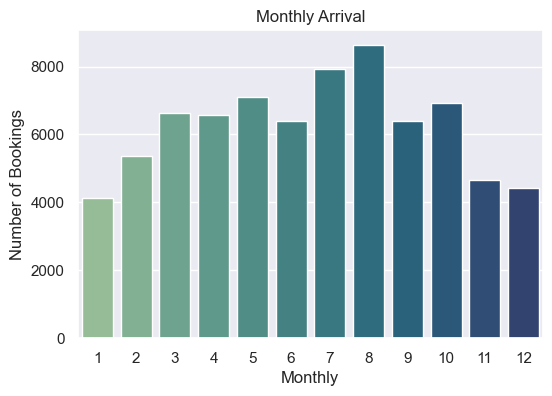

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_checkout, x='arrival_date_month_num', palette = 'crest' )
plt.title('Monthly Arrival')
plt.xlabel('Monthly')
plt.ylabel('Number of Bookings')

Text(0, 0.5, 'Number of Bookings')

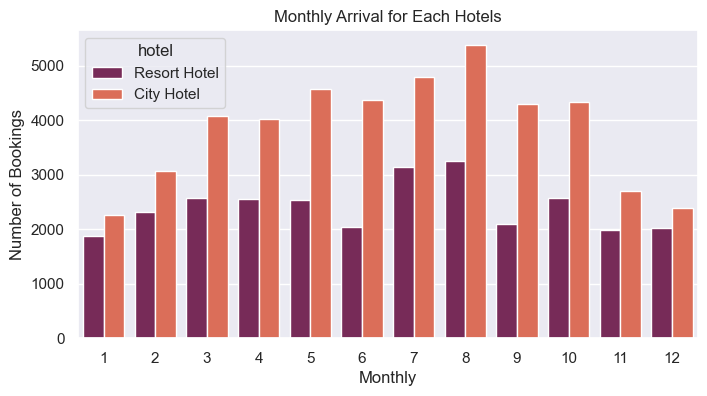

In [30]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_checkout, x='arrival_date_month_num', palette = 'rocket', hue='hotel')
plt.title('Monthly Arrival for Each Hotels')
plt.xlabel('Monthly')
plt.ylabel('Number of Bookings')

#### A. Create a new column `arrival_date` which contains complete information about the year, month, and date of arrival.
#### B. Change the column to datetime type.

In [31]:
# change arrival_date_month_num column into string type
# add the zero padding to create '1' to '01'
df_checkout.arrival_date_month_num.astype('str').str.pad(2,fillchar='0')

0         07
1         07
2         07
3         07
4         07
          ..
119385    08
119386    08
119387    08
119388    08
119389    08
Name: arrival_date_month_num, Length: 75166, dtype: object

In [32]:
df_checkout['arrival_date'] = \
    df_checkout['arrival_date_year'].astype('str') + '-' +\
    df_checkout.arrival_date_month_num.astype('str').str.pad(2,fillchar='0') + '-' +\
    df_checkout.arrival_date_day_of_month.astype('str').str.pad(2,fillchar='0')

C:\Users\adityanugrahass\AppData\Local\Temp\ipykernel_31144\623213626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date'] = \


In [33]:
df_checkout['arrival_date']

0         2015-07-01
1         2015-07-01
2         2015-07-01
3         2015-07-01
4         2015-07-01
             ...    
119385    2017-08-30
119386    2017-08-31
119387    2017-08-31
119388    2017-08-31
119389    2017-08-29
Name: arrival_date, Length: 75166, dtype: object

In [34]:
# change arrival_date column from string type to datetime
df_checkout['arrival_date'] = pd.to_datetime(df_checkout.arrival_date)

C:\Users\adityanugrahass\AppData\Local\Temp\ipykernel_31144\191156065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date'] = pd.to_datetime(df_checkout.arrival_date)


In [35]:
df_checkout['arrival_date']

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 75166, dtype: datetime64[ns]

##### Let's do with time-series using `arrival_date` column. Create 2 dataframe to show: 
#### A. total daily reservation
#### B. average of daily reservation in every week

In [36]:
# A. total daily reservation
df_reservasi_perhari = df_checkout.resample('D',on='arrival_date').size().reset_index().rename(columns={0:'total_reservasi'})
df_reservasi_perhari.head(14)

,arrival_date,total_reservasi
0,2015-07-01,103
1,2015-07-02,36
2,2015-07-03,37
3,2015-07-04,45
4,2015-07-05,37
5,2015-07-06,41
6,2015-07-07,29
7,2015-07-08,45
8,2015-07-09,29
9,2015-07-10,42


In [37]:
# B. average of daily reservation in every week
df_avg_reservasi_harian = df_checkout.resample('D',on='arrival_date').size().reset_index().rename(columns={0:'total_reservasi'}).\
resample('W',on='arrival_date')['total_reservasi'].mean().reset_index()
df_avg_reservasi_harian

,arrival_date,total_reservasi
0,2015-07-05,51.600000
1,2015-07-12,40.571429
2,2015-07-19,53.857143
3,2015-07-26,53.000000
4,2015-08-02,47.142857
...,...,...
109,2017-08-06,101.000000
110,2017-08-13,98.000000
111,2017-08-20,103.714286
112,2017-08-27,103.142857


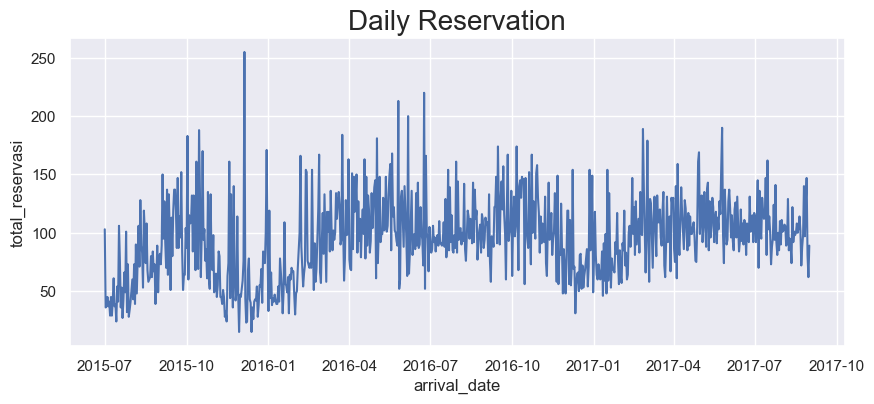

In [38]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_reservasi_perhari, x='arrival_date', y='total_reservasi')
plt.title('Daily Reservation', fontsize=20)
plt.show()

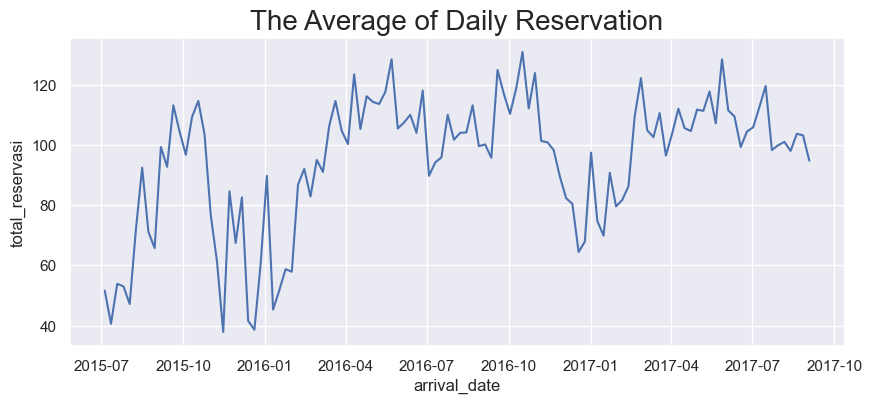

In [39]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_avg_reservasi_harian, x='arrival_date', y='total_reservasi')
plt.title('The Average of Daily Reservation', fontsize=20)
plt.show()

#### A. How much the average of ADR by hotel type and customer type?
#### B. Which one the customer type who has the largest ADR in each hotel type?

In [40]:
# A. the average of ADR by hotel type and customer type
df_checkout.groupby(['hotel','customer_type']).agg({'adr':'mean'}).sort_values(['hotel','adr'], ascending=[True,False])

adr
hotel        customer_type              
City Hotel   Transient        110.423280
             Contract         108.929255
             Transient-Party   93.705007
             Group             87.398712
Resort Hotel Transient         96.001928
             Contract          78.581674
             Group             77.306575
             Transient-Party   77.204010

In [41]:
# B. the customer who has the largest ADR value in each type of hotel
df_checkout.groupby(['hotel','customer_type']).agg({'adr':'size'}).sort_values(['hotel','adr'], ascending=[True,False])

adr
hotel        customer_type         
City Hotel   Transient        32306
             Transient-Party  12463
             Contract          1195
             Group              264
Resort Hotel Transient        20793
             Transient-Party   6272
             Contract          1619
             Group              254

#### Using `df_country` dataframe which contains country name and country code information, **Show top 10 country with highest number of reservation**

In [42]:
# load df_country dataset
df_country = pd.read_csv('https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv')
df_country.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65"""
1,Albania,"""AL""","""ALB""","""8""","""41""","""20"""
2,Algeria,"""DZ""","""DZA""","""12""","""28""","""3"""
3,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170"""
4,Andorra,"""AD""","""AND""","""20""","""42.5""","""1.6"""


In [43]:
# eliminate single quotation mark
df_country['Alpha-3 code'].str.replace('"','').str.strip()

0      AFG
1      ALB
2      DZA
3      ASM
4      AND
      ... 
251    WLF
252    ESH
253    YEM
254    ZMB
255    ZWE
Name: Alpha-3 code, Length: 256, dtype: object

In [44]:
df_country['code'] = df_country['Alpha-3 code'].str.replace('"','').str.strip()

In [45]:
# merge two datasets, df_checkout and df_country with a specific column using pd.merge
df_merged = pd.merge(df_checkout[['id','country']],
                     df_country[['Country','code']],
                     left_on='country',
                     right_on='code',
                     indicator=True,
                     how='left')
df_merged

,id,country,Country,code,_merge
0,0,PRT,Portugal,PRT,both
1,1,PRT,Portugal,PRT,both
2,2,GBR,United Kingdom,GBR,both
3,3,GBR,United Kingdom,GBR,both
4,4,GBR,United Kingdom,GBR,both
...,...,...,...,...,...
75712,119385,BEL,Belgium,BEL,both
75713,119386,FRA,France,FRA,both
75714,119387,DEU,Germany,DEU,both
75715,119388,GBR,United Kingdom,GBR,both


#### Check how many data row in our dataset which can be merged with `df_country`

In [46]:
# count the categorical value on the source of each row
df_merged._merge.value_counts()

both          74269
left_only      1448
right_only        0
Name: _merge, dtype: int64

In [47]:
# check unique values in df_merged to see what are values who cannot be mapped to df_country
df_merged[df_merged._merge=='left_only']['country'].unique()

array([nan, 'CN', 'TMP'], dtype=object)

In [48]:
df_checkout.country.value_counts().head(10)

PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
IRL     2543
ITA     2433
BEL     1868
NLD     1717
USA     1596
Name: country, dtype: int64

In [49]:
# Top 10 country with highest number of reservation
top_10 = df_merged.Country.value_counts().head(10).to_frame()
top_10

,Country
Portugal,21071
United Kingdom,9676
France,8481
Spain,6391
Germany,6069
Ireland,2543
Italy,2433
Belgium,1868
Netherlands,1717
United States,1596


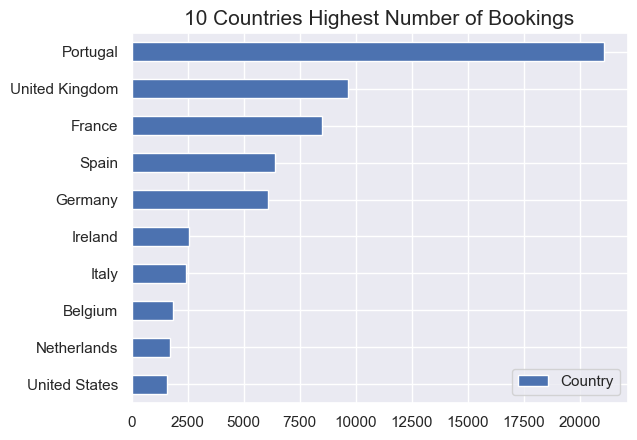

In [50]:
top_10.sort_values(by=['Country'], ascending=True).plot.barh()
plt.title('10 Countries Highest Number of Bookings', fontsize=15)
plt.show()

#### A. How many visitors stay for each reservation?
#### B. Based on dataset, how many the most highest number of visitor? Show the reservation data row that has the most highest number of visitor.

In [51]:
# merge data in column adults, children and babies in df_checkout into one column
df_checkout['total_guest'] = df_checkout.adults + df_checkout.children + df_checkout.babies

C:\Users\adityanugrahass\AppData\Local\Temp\ipykernel_31144\2852438027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['total_guest'] = df_checkout.adults + df_checkout.children + df_checkout.babies


In [52]:
df_checkout.total_guest.max()

5.0

In [53]:
df_checkout[df_checkout.total_guest==df_checkout.total_guest.max()].T

,201,15370,16151,16360,16372,16502,17607,18745,18746,19022,...,118241,118252,118265,118375,118515,118557,118852,118913,119054,119070
id,201,15370,16151,16360,16372,16502,17607,18745,18746,19022,...,118241,118252,118265,118375,118515,118557,118852,118913,119054,119070
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,...,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lead_time,8,15,89,272,79,59,39,0,8,18,...,190,190,208,139,14,6,215,200,8,0
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2016,2015,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
arrival_date_month,July,July,August,August,August,August,October,November,November,December,...,August,August,August,August,August,August,August,August,August,August
arrival_date_week_number,28,28,33,34,33,35,41,48,48,49,...,32,32,33,33,33,34,34,34,34,35
arrival_date_day_of_month,7,10,10,17,14,27,9,28,25,5,...,12,12,14,15,18,21,25,25,26,29
stays_in_weekend_nights,0,0,1,3,4,2,2,0,0,1,...,2,2,1,0,1,1,0,0,2,0
stays_in_week_nights,4,0,5,6,9,3,6,1,2,1,...,3,3,2,4,2,0,1,2,1,1
